<a href="https://colab.research.google.com/github/trancenoid/GANs/blob/master/DOGGO_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import pandas as pd
data_to_dl = pd.concat([ pd.read_csv('a1.csv', sep = '\t',header = None), 
                        pd.read_csv('a2.csv', sep = '\t',header = None), 
                        pd.read_csv('a3.csv', sep = '\t',header = None),
                        pd.read_csv('a4.csv', sep = '\t',header = None), 
                        pd.read_csv('a5.csv', sep = '\t',header = None),
                       pd.read_csv('a6.csv', sep = '\t',header = None),
                       pd.read_csv('a7.csv', sep = '\t',header = None),
                       pd.read_csv('a8.csv', sep = '\t',header = None)])
data_to_dl.to_csv('img_links.csv', index = False, header = False)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!wget http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar

--2019-08-08 16:45:28--  http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 793579520 (757M) [application/x-tar]
Saving to: ‘images.tar’

images.tar          100%[===================>] 756.82M  39.5MB/s    in 21s     

2019-08-08 16:45:48 (36.6 MB/s) - ‘images.tar’ saved [793579520/793579520]



In [0]:
!mkdir images
!mkdir data
!tar -xf images.tar -C './data'
!find ./data/ -type f -print0 | xargs -0 mv -t ./images

In [0]:
import pandas as pd 
import os
data = pd.DataFrame(os.listdir('./images'), columns = ['images'])
data.head()

images
0  n02105641_3331.jpg
1  n02112137_5664.jpg
2  n02112350_7112.jpg
3  n02089867_1082.jpg
4  n02088238_9815.jpg

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale = 1./255)
X = datagen.flow_from_dataframe(data, directory = './images',x_col = 'images', target_size = (64,64), class_mode = None, batch_size = 20580)
X = X[0]

Using TensorFlow backend.


Found 20580 validated image filenames.


In [0]:

import keras
import os
from keras.layers import *
from keras import initializers
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
from keras.models import Model, Sequential
from google.colab.patches import cv2_imshow
from keras.datasets import cifar10
import cv2
import numpy as np
from tqdm import tqdm
def data_loader():
  X = np.empty((len(os.listdir('./data'))), dtype= np.object)
  for i,img in enumerate(tqdm(os.listdir('./data'))):
    imag = cv2.imread("./data/" + img)
    #X = np.append(X, imag.astype(np.float32)/255)
    X[i] = imag.astype(np.float32)
  return X
#(X_train, y_train), (X_test, y_test) = cifar10.load_data()
#X_train = X_train[y_train[:,0]==1]
#X = (X_train - 127.5)/127.5
#X = (X_train)/255
#X = data_loader()
#

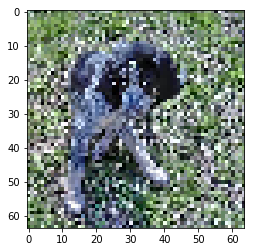

In [0]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
#img = image.array_to_img(X[5], scale=True)
plt.imshow(X[13])

In [0]:
adam = Adam(lr = 0.0001, beta_1 = 0.5)
inShape = 100

def build_generator():
  generator = Sequential()
  generator.add(Dense(16*16*256,input_shape = (inShape,), activation = 'relu'))
  generator.add(BatchNormalization(momentum = 0.9))
  generator.add(Reshape((16,16,256)))
  
  generator.add(Conv2D(256, kernel_size = 5, padding = 'same'))
  generator.add(BatchNormalization(momentum = 0.9))
  generator.add(LeakyReLU(0.1))
  
  generator.add(Conv2DTranspose(256, strides = 2 ,kernel_size = 4, padding = 'same'))
  generator.add(BatchNormalization(momentum = 0.9))
  generator.add(LeakyReLU(0.1))
  
  generator.add(Conv2D(256, kernel_size = 5, padding = 'same'))
  generator.add(BatchNormalization(momentum = 0.9))
  generator.add(LeakyReLU(0.1))

  generator.add(Conv2D(256, kernel_size = 5, padding = 'same'))
  generator.add(BatchNormalization(momentum = 0.9))
  generator.add(LeakyReLU(0.1))

  generator.add(Conv2D(256, kernel_size = 5, padding = 'same'))
  generator.add(BatchNormalization(momentum = 0.9))
  generator.add(LeakyReLU(0.1))
  
  generator.add(Conv2DTranspose(256, strides = 2 ,kernel_size = 4, padding = 'same'))
  generator.add(BatchNormalization(momentum = 0.9))
  generator.add(LeakyReLU(0.1))
  
  generator.add(Conv2D(256, kernel_size = 5, padding = 'same'))
  generator.add(BatchNormalization(momentum = 0.9))
  generator.add(LeakyReLU(0.1))
  
  generator.add(Conv2D(3, kernel_size = 5, padding = 'same', activation = 'tanh'))

  return generator

def build_discriminator():
  D = Sequential()
  D.add(Conv2D(256, kernel_size = 3, padding = 'same', 
               input_shape = (64,64,3)))
  D.add(BatchNormalization(momentum = 0.9))
  D.add(LeakyReLU(0.1))
  D.add(Conv2D(256, 5, strides = 2, padding = 'same'))
  D.add(BatchNormalization(momentum = 0.9))
  D.add(LeakyReLU(0.1))
  D.add(Conv2D(128, kernel_size = 5, strides = 2, padding = 'same'))
  D.add(BatchNormalization(momentum = 0.9))
  D.add(LeakyReLU(0.1))
  D.add(Conv2D(128, kernel_size = 5, strides = 2, padding = 'same'))
  D.add(BatchNormalization(momentum = 0.9))
  D.add(LeakyReLU(0.1))
  D.add(Conv2D(64, kernel_size = 5, strides = 2, padding = 'same'))
  D.add(BatchNormalization(momentum = 0.9))
  D.add(LeakyReLU(0.1))
  D.add(Flatten())
  D.add(Dropout(0.4))
  
  D.add(Dense(1, activation = 'sigmoid'))
  D.compile(loss = 'binary_crossentropy', optimizer = adam)
  
  return D

G = build_generator()
G.trainable = False
G.layers[-3].trainable = True
G.layers[-4].trainable = True
D = build_discriminator()
D.trainable = False
ganIn = Input(shape = (inShape,))
genOut = G(ganIn)
ganOut = D(genOut)
GAN = Model(inputs = ganIn, outputs = ganOut)


GAN.compile(loss = 'binary_crossentropy', optimizer = adam)
  
  
 

W0808 16:47:14.273774 139772103083904 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0808 16:47:14.276659 139772103083904 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0808 16:47:14.279902 139772103083904 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0808 16:47:14.410075 139772103083904 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0808 16:47:14.490676 

In [0]:
G.summary()
#D.summary()
#GAN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 65536)             6619136   
_________________________________________________________________
batch_normalization_1 (Batch (None, 65536)             262144    
_________________________________________________________________
reshape_1 (Reshape)          (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 256)       1638656   
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 256)       1024      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 32, 32, 256)       1048832   
__________

  0%|          | 0/1286 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
  0%|          | 1/1286 [00:15<5:31:07, 15.46s/it]/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
100%|██████████| 1286/1286 [18:02<00:00,  1

  Epoch: 126, Generator Loss: 2.2395996934050637, Discriminator Loss: 0.21302269472165575


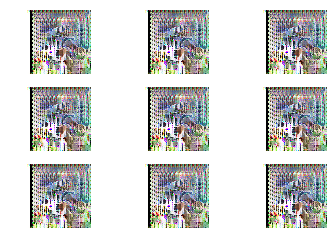

100%|██████████| 1286/1286 [17:47<00:00,  1.20it/s]


  Epoch: 127, Generator Loss: 2.8657256896907395, Discriminator Loss: 0.20326793395434717


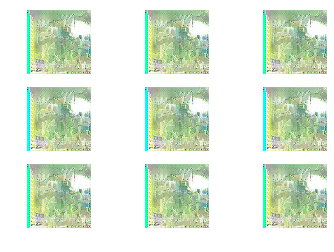

100%|██████████| 1286/1286 [17:48<00:00,  1.20it/s]


  Epoch: 128, Generator Loss: 1.887456173564613, Discriminator Loss: 0.2685634142619269


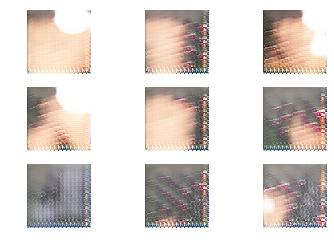

100%|██████████| 1286/1286 [17:46<00:00,  1.21it/s]


  Epoch: 129, Generator Loss: 2.220070282116092, Discriminator Loss: 0.2456165123180505


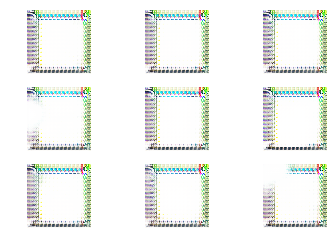

100%|██████████| 1286/1286 [17:46<00:00,  1.20it/s]


  Epoch: 130, Generator Loss: 2.4332810457025307, Discriminator Loss: 0.2353218957480524


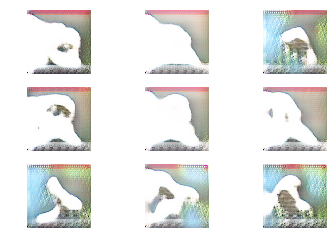

100%|██████████| 1286/1286 [17:49<00:00,  1.20it/s]


  Epoch: 131, Generator Loss: 2.566259707343036, Discriminator Loss: 0.23612783861985287


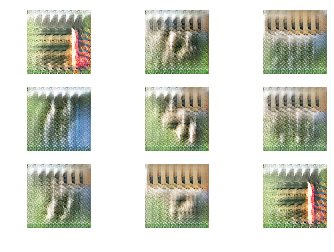

100%|██████████| 1286/1286 [17:49<00:00,  1.20it/s]


  Epoch: 132, Generator Loss: 2.1109964387899796, Discriminator Loss: 0.2776107945440346


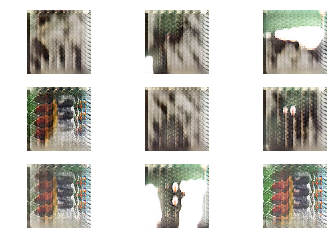

100%|██████████| 1286/1286 [17:48<00:00,  1.20it/s]


  Epoch: 133, Generator Loss: 2.007678188597943, Discriminator Loss: 0.2972592881896633


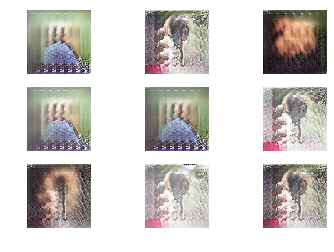

100%|██████████| 1286/1286 [17:49<00:00,  1.21it/s]


  Epoch: 134, Generator Loss: 1.7189670312558742, Discriminator Loss: 0.3353939123370599


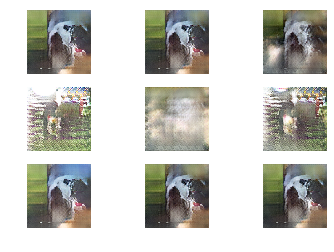

100%|██████████| 1286/1286 [17:48<00:00,  1.20it/s]


  Epoch: 135, Generator Loss: 1.6357363858817848, Discriminator Loss: 0.34642354521790336


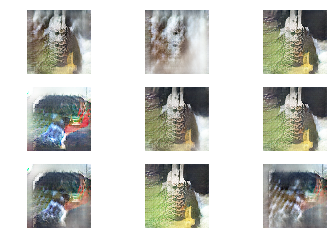

100%|██████████| 1286/1286 [17:48<00:00,  1.20it/s]


  Epoch: 136, Generator Loss: 1.606290400303425, Discriminator Loss: 0.3493252897730697


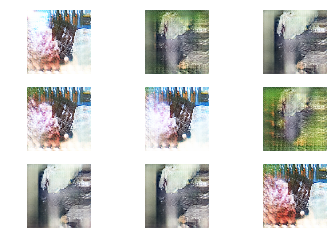

100%|██████████| 1286/1286 [17:48<00:00,  1.21it/s]


  Epoch: 137, Generator Loss: 1.7589898866262361, Discriminator Loss: 0.36065356111266933


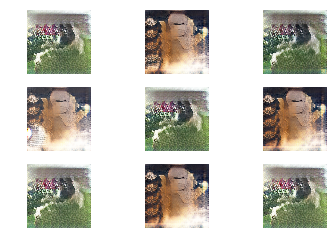

100%|██████████| 1286/1286 [17:46<00:00,  1.21it/s]


  Epoch: 138, Generator Loss: 1.577618496567822, Discriminator Loss: 0.36738092051369964


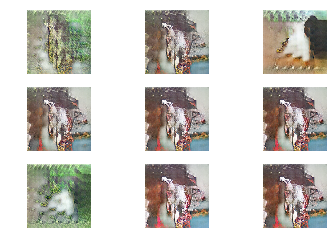

100%|██████████| 1286/1286 [17:44<00:00,  1.20it/s]


  Epoch: 139, Generator Loss: 1.5795191468469636, Discriminator Loss: 0.3768269986632638


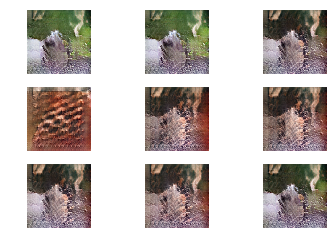

100%|██████████| 1286/1286 [17:45<00:00,  1.21it/s]


  Epoch: 140, Generator Loss: 1.4540043244135463, Discriminator Loss: 0.3737095105309694


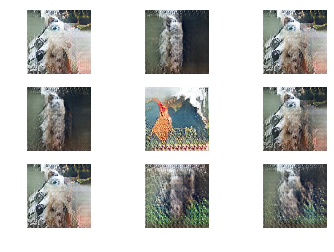

100%|██████████| 1286/1286 [17:46<00:00,  1.21it/s]


  Epoch: 141, Generator Loss: 1.441033673190264, Discriminator Loss: 0.3799835556703815


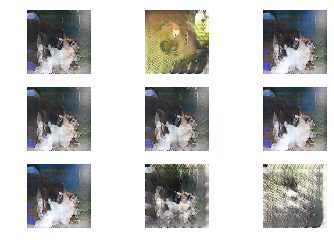

100%|██████████| 1286/1286 [17:44<00:00,  1.22it/s]


  Epoch: 142, Generator Loss: 1.4527361695748837, Discriminator Loss: 0.3912261348350979


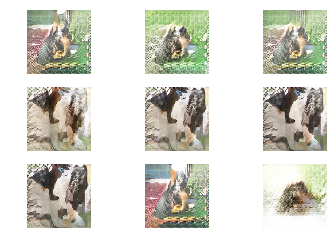

100%|██████████| 1286/1286 [17:48<00:00,  1.20it/s]


  Epoch: 143, Generator Loss: 1.4281808215064542, Discriminator Loss: 0.3831546873109152


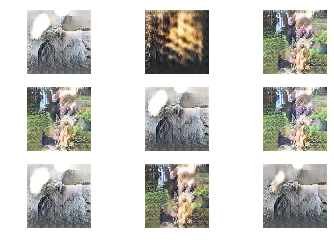

100%|██████████| 1286/1286 [17:48<00:00,  1.20it/s]


  Epoch: 144, Generator Loss: 1.5054308689296432, Discriminator Loss: 0.3923946910915812


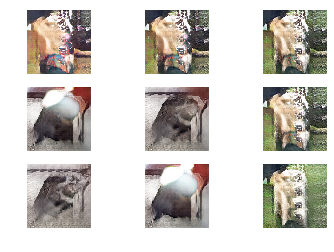

  8%|▊         | 105/1286 [01:27<16:20,  1.20it/s]

In [0]:
from keras.models import load_model
from tqdm import tqdm
dLosses = []
gLosses = []
img_noise = np.random.rand(*X.shape)
# Plot the loss from each batch
def plotLoss(epoch):
    plt.figure(figsize=(10, 8))
    plt.plot(dLosses, label='Discriminitive loss')
    plt.plot(gLosses, label='Generative loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    #plt.savefig('dcgan_loss_epoch_%d.png' % epoch)
def generate_noise(n_samples, noise_dim):
  X = np.random.normal(0, 1, size=(n_samples, noise_dim))
  return X

# Create a wall of generated MNIST images
def show_imgs(batchidx):
  
  noise = generate_noise(9, 100)
  gen_imgs = G.predict(noise)

  fig, axs = plt.subplots(3, 3)
  count = 0
  for i in range(3):
    for j in range(3):
      # Dont scale the images back, let keras handle it
      img = image.array_to_img(gen_imgs[count], scale=True)
      axs[i,j].imshow(img)
      axs[i,j].axis('off')
      count += 1
  plt.show()
  plt.close()  

# Save the generator and discriminator networks (and weights) for later use
def saveModels(epoch):
  G.save_weights('drive/My Drive/doggo_gan/generator_epoch_%d.h5' % epoch)
  D.save_weights('drive/My Drive/doggo_gan/discriminator_epoch_%d.h5' % epoch)
def loadModels( epoch):
  D.load_weights('drive/My Drive/doggo_gan/discriminator_epoch_%d.h5' % epoch)
  G.load_weights('drive/My Drive/doggo_gan/generator_epoch_%d.h5' % epoch, by_name = True)
def train(epochs=1, BATCH_SIZE=16, resume_epoch = -1):
  if(resume_epoch != -1):
    loadModels(resume_epoch)
  else:
    resume_epoch = 0
  num_batches = int(X.shape[0]/BATCH_SIZE)
  N_EPOCHS = epochs
  for epoch in range(resume_epoch, resume_epoch + N_EPOCHS):

    cum_d_loss = 0.
    cum_g_loss = 0.

    for batch_idx in tqdm(range(num_batches)):
      # Get the next set of real images to be used in this iteration
      images = X[batch_idx*BATCH_SIZE : (batch_idx+1)*BATCH_SIZE]

      noise_data = generate_noise(BATCH_SIZE, 100)
      generated_images = G.predict(noise_data)

      # Train on soft labels (add noise to labels as well)
      noise_prop = 0.05 # Randomly flip 5% of labels

      # Prepare labels for real data
      true_labels = np.zeros((BATCH_SIZE, 1)) + np.random.uniform(low=0.0, high=0.1, size=(BATCH_SIZE, 1))
      flipped_idx = np.random.choice(np.arange(len(true_labels)), size=int(noise_prop*len(true_labels)))
      true_labels[flipped_idx] = 1 - true_labels[flipped_idx]
      # Train discriminator on real data
      d_loss_true = D.train_on_batch(images, true_labels)

      # Prepare labels for generated data
      gene_labels = np.ones((BATCH_SIZE, 1)) - np.random.uniform(low=0.0, high=0.1, size=(BATCH_SIZE, 1))
      flipped_idx = np.random.choice(np.arange(len(gene_labels)), size=int(noise_prop*len(gene_labels)))
      gene_labels[flipped_idx] = 1 - gene_labels[flipped_idx]

      # Train discriminator on generated data
      d_loss_gene = D.train_on_batch(generated_images, gene_labels)
      d_loss = 0.5 * np.add(d_loss_true, d_loss_gene)
      
      cum_d_loss += d_loss

      # Train generator
      noise_data = generate_noise(BATCH_SIZE, 100)
      g_loss = GAN.train_on_batch(noise_data, np.zeros((BATCH_SIZE, 1)))
      cum_g_loss += g_loss
    dLosses.append(cum_d_loss)
    gLosses.append(cum_g_loss)
    print('  Epoch: {}, Generator Loss: {}, Discriminator Loss: {}'.format(epoch+1, cum_g_loss/num_batches, cum_d_loss/num_batches))
    show_imgs("epoch" + str(epoch))
    saveModels(epoch+1)
    
  plotLoss(epoch)
if __name__ == '__main__':  
    train(30, 16, 125)

  0%|          | 0/1286 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
100%|██████████| 1286/1286 [15:45<00:00,  1.35it/s]


  Epoch: 111, Generator Loss: 3.1686010961862596, Discriminator Loss: 0.2682687209377393


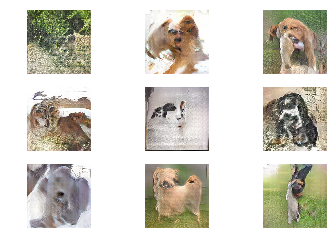

100%|██████████| 1286/1286 [15:44<00:00,  1.36it/s]


  Epoch: 112, Generator Loss: 3.120311311438888, Discriminator Loss: 0.27102899953468035


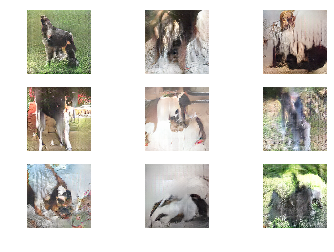

100%|██████████| 1286/1286 [15:45<00:00,  1.36it/s]


  Epoch: 113, Generator Loss: 3.1080320532409065, Discriminator Loss: 0.26509629492394476


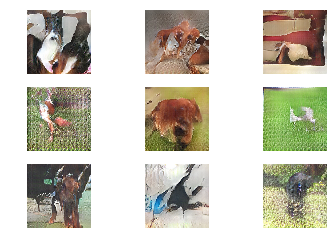

100%|██████████| 1286/1286 [15:45<00:00,  1.36it/s]


  Epoch: 114, Generator Loss: 3.0827328664240534, Discriminator Loss: 0.2651727452735137


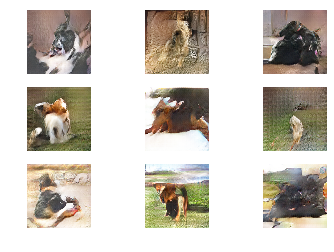

100%|██████████| 1286/1286 [15:45<00:00,  1.37it/s]


  Epoch: 115, Generator Loss: 3.1888012203096787, Discriminator Loss: 0.2664606284182142


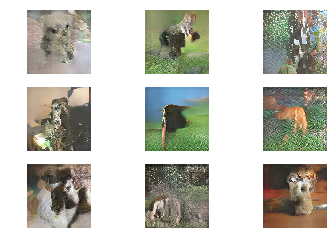

100%|██████████| 1286/1286 [15:46<00:00,  1.36it/s]


  Epoch: 116, Generator Loss: 3.1390460479546856, Discriminator Loss: 0.25327144256136835


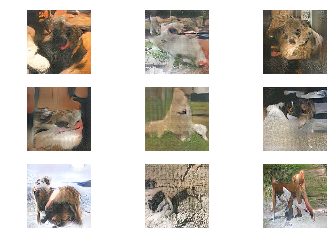

100%|██████████| 1286/1286 [15:44<00:00,  1.36it/s]


  Epoch: 117, Generator Loss: 3.218152359058475, Discriminator Loss: 0.2641737946130996


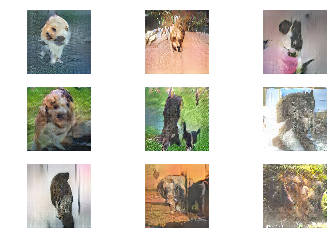

100%|██████████| 1286/1286 [15:44<00:00,  1.36it/s]


  Epoch: 118, Generator Loss: 3.1107777500319442, Discriminator Loss: 0.25968406078279666


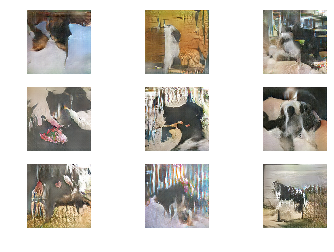

100%|██████████| 1286/1286 [15:45<00:00,  1.37it/s]


  Epoch: 119, Generator Loss: 3.148819775872431, Discriminator Loss: 0.2521734194682323


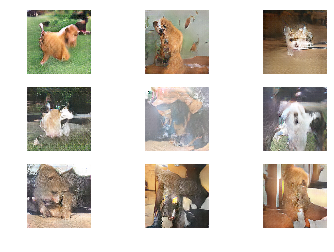

100%|██████████| 1286/1286 [15:44<00:00,  1.37it/s]


  Epoch: 120, Generator Loss: 3.0977260946740817, Discriminator Loss: 0.2529786073401408


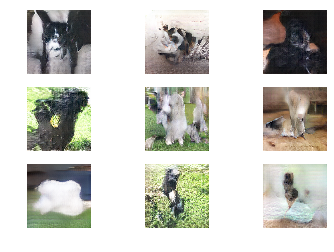

100%|██████████| 1286/1286 [15:44<00:00,  1.36it/s]


  Epoch: 121, Generator Loss: 3.100635285024324, Discriminator Loss: 0.24978729876259437


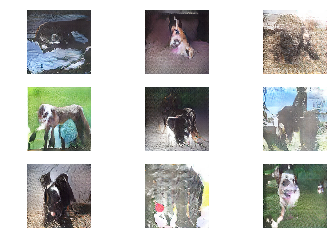

100%|██████████| 1286/1286 [15:44<00:00,  1.36it/s]


  Epoch: 122, Generator Loss: 3.1589683291747077, Discriminator Loss: 0.25605768272378027


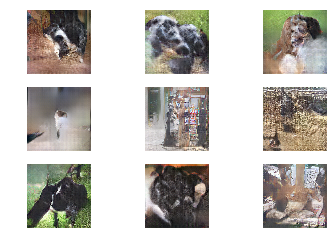

100%|██████████| 1286/1286 [15:45<00:00,  1.36it/s]


  Epoch: 123, Generator Loss: 3.1364533367739122, Discriminator Loss: 0.2493784041209132


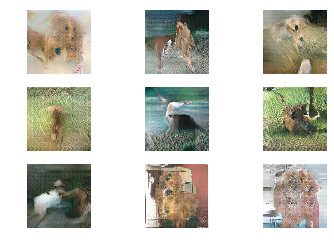

100%|██████████| 1286/1286 [15:45<00:00,  1.36it/s]


  Epoch: 124, Generator Loss: 3.184217467811393, Discriminator Loss: 0.249209358720442


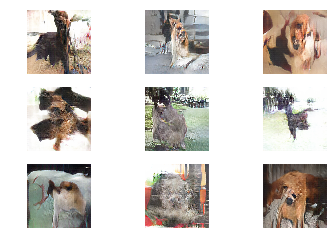

100%|██████████| 1286/1286 [15:45<00:00,  1.36it/s]


  Epoch: 125, Generator Loss: 3.189310571384467, Discriminator Loss: 0.2482204226252636


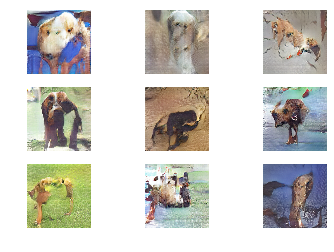

 11%|█         | 138/1286 [01:41<14:02,  1.36it/s]

In [0]:
from keras.models import load_model
from tqdm import tqdm
dLosses = []
gLosses = []
img_noise = np.random.rand(*X.shape)
# Plot the loss from each batch
def plotLoss(epoch):
    plt.figure(figsize=(10, 8))
    plt.plot(dLosses, label='Discriminitive loss')
    plt.plot(gLosses, label='Generative loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    #plt.savefig('dcgan_loss_epoch_%d.png' % epoch)
def generate_noise(n_samples, noise_dim):
  X = np.random.normal(0, 1, size=(n_samples, noise_dim))
  return X

# Create a wall of generated MNIST images
def show_imgs(batchidx):
  
  noise = generate_noise(9, 100)
  gen_imgs = G.predict(noise)

  fig, axs = plt.subplots(3, 3)
  count = 0
  for i in range(3):
    for j in range(3):
      # Dont scale the images back, let keras handle it
      img = image.array_to_img(gen_imgs[count], scale=True)
      axs[i,j].imshow(img)
      axs[i,j].axis('off')
      count += 1
  plt.show()
  plt.close()  

# Save the generator and discriminator networks (and weights) for later use
def saveModels(epoch):
  G.save('drive/My Drive/doggo_gan/generator_epoch_%d.h5' % epoch)
  D.save('drive/My Drive/doggo_gan/discriminator_epoch_%d.h5' % epoch)
def loadModels( epoch):
  D = load_model('drive/My Drive/doggo_gan/discriminator_epoch_%d.h5' % epoch)
  G = load_model('drive/My Drive/doggo_gan/generator_epoch_%d.h5' % epoch)
def train(epochs=1, BATCH_SIZE=16, resume_epoch = -1):
  if(resume_epoch != -1):
    pass
    #loadModels(resume_epoch)
  else:
    resume_epoch = 0
  num_batches = int(X.shape[0]/BATCH_SIZE)
  N_EPOCHS = epochs
  for epoch in range(resume_epoch, resume_epoch + N_EPOCHS):

    cum_d_loss = 0.
    cum_g_loss = 0.

    for batch_idx in tqdm(range(num_batches)):
      # Get the next set of real images to be used in this iteration
      images = X[batch_idx*BATCH_SIZE : (batch_idx+1)*BATCH_SIZE]

      noise_data = generate_noise(BATCH_SIZE, 100)
      generated_images = G.predict(noise_data)

      # Train on soft labels (add noise to labels as well)
      noise_prop = 0.05 # Randomly flip 5% of labels

      # Prepare labels for real data
      true_labels = np.zeros((BATCH_SIZE, 1)) + np.random.uniform(low=0.0, high=0.1, size=(BATCH_SIZE, 1))
      flipped_idx = np.random.choice(np.arange(len(true_labels)), size=int(noise_prop*len(true_labels)))
      true_labels[flipped_idx] = 1 - true_labels[flipped_idx]
      # Train discriminator on real data
      d_loss_true = D.train_on_batch(images, true_labels)

      # Prepare labels for generated data
      gene_labels = np.ones((BATCH_SIZE, 1)) - np.random.uniform(low=0.0, high=0.1, size=(BATCH_SIZE, 1))
      flipped_idx = np.random.choice(np.arange(len(gene_labels)), size=int(noise_prop*len(gene_labels)))
      gene_labels[flipped_idx] = 1 - gene_labels[flipped_idx]

      # Train discriminator on generated data
      d_loss_gene = D.train_on_batch(generated_images, gene_labels)
      d_loss = 0.5 * np.add(d_loss_true, d_loss_gene)
      
      cum_d_loss += d_loss

      # Train generator
      noise_data = generate_noise(BATCH_SIZE, 100)
      g_loss = GAN.train_on_batch(noise_data, np.zeros((BATCH_SIZE, 1)))
      cum_g_loss += g_loss
    dLosses.append(cum_d_loss)
    gLosses.append(cum_g_loss)
    print('  Epoch: {}, Generator Loss: {}, Discriminator Loss: {}'.format(epoch+1, cum_g_loss/num_batches, cum_d_loss/num_batches))
    show_imgs("epoch" + str(epoch))
    saveModels(epoch+1)
  plotLoss(epoch)
if __name__ == '__main__':  
    train(30, 16, 125)

In [0]:
https://www.awseducate.com/registration#INFO-Student